In [1]:
# Using readlines()
file1 = open("abalone.txt", "r")
Lines = file1.readlines()

labels = []
data = []

X = []
y = []
# process data for libsvm input
for line in Lines:
    raw = line.strip().split(",")
    processed = []
    for index, v in enumerate(raw):
        # read last column as label
        if index == 8:
            val = -1
            if float(v) <= 9:
                val = 1
            y.append(val)
        # convert string class 3 binary cols
        elif v == "M":
            processed.append(1)
            processed.append(0)
            processed.append(0)
        elif v == "F":
            processed.append(0)
            processed.append(1)
            processed.append(0)
        elif v == "I":
            processed.append(0)
            processed.append(0)
            processed.append(1)
        else:
            processed.append(float(v))
    X.append(processed)


In [16]:
from sklearn import preprocessing
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=0)

# split into train and test set
X_train, X_test = X[:3133], X[3133:]
y_train, y_test = y[:3133], y[3133:]

# fit a scaler to the test set
scaler = preprocessing.StandardScaler().fit(X_train)

# scale the training set
X_train = scaler.transform(X_train)

# scale the test set using same scaler from training set
X_test = scaler.transform(X_test)

# shuffle train data
X_train, y_train = shuffle(X_train, y_train, random_state=0)


In [27]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

TRange = [100*(i+1) for i in range(30)]

adaBestT = 0
adaBestAcc = 0
adaAccs = []
adaStds = []

# Adaboost CV
for T in TRange:
    
    # FROM DOCUMENTATION: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
    # paramters: 'loss' gives the loss function to be optimized.
    # 'deviance' refers to deviance (= logistic regression).
    # 'exponential' recovers the AdaBoost algorithm.
    # 'max_depth=1' for boosting stumps
    clf = GradientBoostingClassifier(n_estimators=T, loss='exponential', learning_rate=1.0, max_depth=1, random_state=0)
    
    # compute Tenfold cross validation scores (with different splits each time):
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    acc = scores.mean()
    std = scores.std()
    
    # record acc & std
    adaAccs.append(acc)
    adaStds.append(std)
    
    # record best params
    if acc > adaBestAcc:
        adaBestAcc = acc
        adaBestT = T
            
    print("T=%d, Accuracy: %0.4f, STD: %0.4f)" % (T, acc, std))

    
print("Best T for Adaboost: %d, with acc: %0.4f" % (adaBestT, adaBestAcc))

T=100, Accuracy: 0.7861, STD: 0.0256)
T=200, Accuracy: 0.7881, STD: 0.0233)
T=300, Accuracy: 0.7861, STD: 0.0260)
T=400, Accuracy: 0.7881, STD: 0.0211)
T=500, Accuracy: 0.7855, STD: 0.0221)
T=600, Accuracy: 0.7855, STD: 0.0203)
T=700, Accuracy: 0.7849, STD: 0.0188)
T=800, Accuracy: 0.7823, STD: 0.0223)
T=900, Accuracy: 0.7823, STD: 0.0229)
T=1000, Accuracy: 0.7807, STD: 0.0217)
T=1100, Accuracy: 0.7791, STD: 0.0203)
T=1200, Accuracy: 0.7807, STD: 0.0191)
T=1300, Accuracy: 0.7820, STD: 0.0208)
T=1400, Accuracy: 0.7807, STD: 0.0190)
T=1500, Accuracy: 0.7804, STD: 0.0197)
T=1600, Accuracy: 0.7801, STD: 0.0177)
T=1700, Accuracy: 0.7801, STD: 0.0184)
T=1800, Accuracy: 0.7791, STD: 0.0164)
T=1900, Accuracy: 0.7788, STD: 0.0182)
T=2000, Accuracy: 0.7766, STD: 0.0197)
T=2100, Accuracy: 0.7769, STD: 0.0207)
T=2200, Accuracy: 0.7782, STD: 0.0215)
T=2300, Accuracy: 0.7753, STD: 0.0208)
T=2400, Accuracy: 0.7731, STD: 0.0217)
T=2500, Accuracy: 0.7743, STD: 0.0206)
T=2600, Accuracy: 0.7753, STD: 0.0

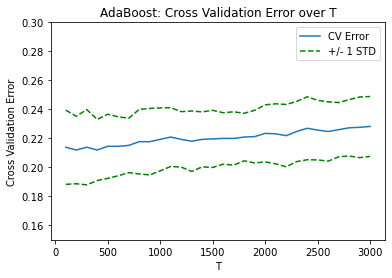

In [36]:
import matplotlib.pyplot as plt

err = [1 - adaAccs[i] for i in range(len(adaAccs))]
plt.plot(TRange, err)

above = [err[i] + adaStds[i] for i in range(len(err))]
plt.plot(TRange, above, "g--")

below = [err[i] - adaStds[i] for i in range(len(err))]
plt.plot(TRange, below, "g--")

plt.legend(["CV Error", "+/- 1 STD"])
plt.title("AdaBoost: Cross Validation Error over T")
plt.xlabel("T")
plt.ylabel("Cross Validation Error")
plt.ylim([0.15,0.3])
plt.show()

In [29]:
logicBestT = 0
logicBestAcc = 0
logicAccs = []
logicStds = []

# Logisitic Loss Boosting CV
for T in TRange:
    
    # FROM DOCUMENTATION: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
    # paramters: 'loss' gives the loss function to be optimized.
    # 'deviance' refers to deviance (= logistic regression).
    # 'exponential' recovers the AdaBoost algorithm.
    # 'max_depth=1' for boosting stumps
    clf = GradientBoostingClassifier(n_estimators=T, loss='deviance', learning_rate=1.0, max_depth=1, random_state=0)
    
    # compute Tenfold cross validation scores (with different splits each time):
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    acc = scores.mean()
    std = scores.std()
    
    # record acc & std
    logicAccs.append(acc)
    logicStds.append(std)
    
    # record best params
    if acc > logicBestAcc:
        logicBestAcc = acc
        logicBestT = T
            
    print("T=%d, Accuracy: %0.4f, STD: %0.4f)" % (T, acc, std))

print("Best T for LL-Boosting: %d, with acc: %0.4f" % (logicBestT, logicBestAcc))

T=100, Accuracy: 0.7897, STD: 0.0219)
T=200, Accuracy: 0.7893, STD: 0.0209)
T=300, Accuracy: 0.7922, STD: 0.0236)
T=400, Accuracy: 0.7935, STD: 0.0231)
T=500, Accuracy: 0.7909, STD: 0.0216)
T=600, Accuracy: 0.7893, STD: 0.0222)
T=700, Accuracy: 0.7881, STD: 0.0211)
T=800, Accuracy: 0.7890, STD: 0.0188)
T=900, Accuracy: 0.7861, STD: 0.0186)
T=1000, Accuracy: 0.7868, STD: 0.0197)
T=1100, Accuracy: 0.7861, STD: 0.0175)
T=1200, Accuracy: 0.7849, STD: 0.0181)
T=1300, Accuracy: 0.7814, STD: 0.0186)
T=1400, Accuracy: 0.7810, STD: 0.0190)
T=1500, Accuracy: 0.7807, STD: 0.0208)
T=1600, Accuracy: 0.7804, STD: 0.0212)
T=1700, Accuracy: 0.7794, STD: 0.0214)
T=1800, Accuracy: 0.7794, STD: 0.0222)
T=1900, Accuracy: 0.7801, STD: 0.0231)
T=2000, Accuracy: 0.7778, STD: 0.0226)
T=2100, Accuracy: 0.7778, STD: 0.0249)
T=2200, Accuracy: 0.7775, STD: 0.0250)
T=2300, Accuracy: 0.7775, STD: 0.0246)
T=2400, Accuracy: 0.7766, STD: 0.0235)
T=2500, Accuracy: 0.7747, STD: 0.0244)
T=2600, Accuracy: 0.7756, STD: 0.0

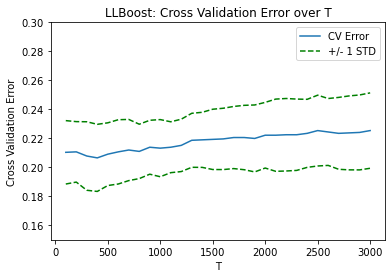

In [38]:
import matplotlib.pyplot as plt

err = [1 - logicAccs[i] for i in range(len(logicAccs))]
plt.plot(TRange, err)

above = [err[i] + logicStds[i] for i in range(len(err))]
plt.plot(TRange, above, "g--")

below = [err[i] - logicStds[i] for i in range(len(err))]
plt.plot(TRange, below, "g--")

plt.legend(["CV Error", "+/- 1 STD"])
plt.title("LLBoost: Cross Validation Error over T")
plt.xlabel("T")
plt.ylabel("Cross Validation Error")
plt.ylim([0.15,0.3])
plt.show()

In [31]:
# train and test
adaScoresTest = []
logicScoresTest = []

adaScoresTrain = []
logicScoresTrain = []

# Logisitic Loss Boosting
for T in TRange:

    adaBooster = GradientBoostingClassifier(n_estimators=T, loss='exponential', learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
    aTest = adaBooster.score(X_test, y_test)
    aTrain = adaBooster.score(X_train, y_train)
        
    llBooster = GradientBoostingClassifier(n_estimators=T, loss='deviance', learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
    lTest = llBooster.score(X_test, y_test)
    lTrain = llBooster.score(X_train, y_train)


    # record scores
    adaScoresTest.append(aTest)
    logicScoresTest.append(lTest)
    
    adaScoresTrain.append(aTrain)
    logicScoresTrain.append(lTrain)


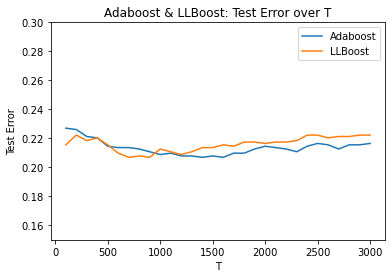

In [39]:
import matplotlib.pyplot as plt

Adaerr = [1 - adaScoresTest[i] for i in range(len(adaScoresTest))]
LLerr = [1 - logicScoresTest[i] for i in range(len(logicScoresTest))]

plt.plot(TRange, Adaerr)
plt.plot(TRange, LLerr)

plt.title("Adaboost & LLBoost: Test Error over T")
plt.xlabel("T")
plt.ylabel("Test Error")
plt.legend(["Adaboost", "LLBoost"])
plt.ylim([0.15,0.3])
plt.show()

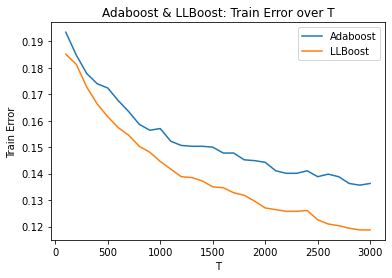

In [41]:
import matplotlib.pyplot as plt

Adaerr = [1 - adaScoresTrain[i] for i in range(len(adaScoresTrain))]
LLerr = [1 - logicScoresTrain[i] for i in range(len(logicScoresTrain))]

plt.plot(TRange, Adaerr)
plt.plot(TRange, LLerr)

plt.title("Adaboost & LLBoost: Train Error over T")
plt.xlabel("T")
plt.ylabel("Train Error")
plt.legend(["Adaboost", "LLBoost"])
plt.show()